<table align="left" width="100%">
    <tr>
        <td align="center" style="background-color: #E6F7FF;">
            <img src="HouseImage.jpeg" alt="House Icon" width="100" height="100" 
                 style="border-radius: 20%; border: 3px solid #56aeff;"><br><br>
            <font color="#56aeff" size="5px"><b>Machine Learning Regression</b></font><br>
            <font color="#145da0" size="6px"><b>Bangalore House Prediction</b></font>
        </td>
    </tr>
</table>


<table align="right" width="100%">
    <tr>
        <td align="right">
            <font color="#145da0" size="4px"><b>Project By Abhilash Jose</b></font>
        </td>
    </tr>
</table>


### **Problem Definition:**  
House prices in Bangalore change due to **location, size, and features**, making it hard to know the right price. Buyers might pay too much, and sellers might sell for less than they should. This project uses **data and machine learning** to make price predictions **more accurate and reliable**. 

### **Objective:**  
The goal of this project is to build a **machine learning model** that predicts house prices in **Bangalore** based on factors like **location, size, area type, and amenities**. This will help buyers, sellers, and investors make better decisions.  

<a id="Importing_Libraries"></a>
<div align='left'>
    <font color="#145da0" , size = 5px>
        <b> 1. Importing Libraries </b>
    </font>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score, root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor



<a id="Data_Collection_Intro"></a>
<div align='left'>
    <font color="#145da0" , size = 5px>
        <b> 1.Data Collection </b>
    </font>
</div>

**Dataset Source: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data**

<a id="Data_Desciption"></a>
<div align='left'>
    <font color="#145da0" , size = 3px>
        <b> 1.1 Data Desciption </b>
    </font>
</div>

### Bangalore House Price Data Dictionary
* **area_type**: Specifies the type of area measurement, such as "Super built-up Area," "Built-up Area," or "Plot Area."
* **availability**: Indicates the status of the property—whether it's "Ready to Move" or available from a future date.
* **location**: The locality where the house is situated within Bangalore.
* **size**: Represents the number of bedrooms (e.g., "2 BHK" or "4 Bedroom").
* **society**: Name of the society or apartment complex (may have missing values).
* **total_sqft**: The total area of the property in square feet.
* **bath**: Number of bathrooms in the house.
* **balcony**: Number of balconies in the house.
* **price**: The selling price of the house in lakhs (Indian currency).


<a id="Data_Importing"></a>
<div align='left'>
    <font color="#145da0" , size = 3px>
        <b> 1.2 Data_Importing </b>
    </font>
</div>

In [8]:
df_House= pd.read_csv("Bengaluru_House_Data.csv")
df_House.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


<a id="Data_Shape"></a>
<div align='left'>
    <font color="#145da0" , size = 3px>
        <b> 1.3 Data Shape </b>
    </font>
</div>

In [11]:
print("Total Rows:",df_House.shape[0])
print("Total Columns:",df_House.shape[1])

Total Rows: 13320
Total Columns: 9


<a id="Data_Type"></a>
<div align='left'>
    <font color="#145da0" , size = 3px>
        <b> 1.4 Data Types </b>
    </font>
</div>

In [14]:
df_House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Inference**
* Some columns, such as society, bath, and balcony, have missing values, requiring data cleaning before modeling.
* Columns 'size' and 'total_sqft' need to be converted to numeric for proper analysis.

<a id="Data_Descibe"></a>
<div align='left'>
    <font color="#145da0" , size = 3px>
        <b> 1.5 Data Describe </b>
    </font>
</div>

In [18]:
#numerical
df_House.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [20]:
#categorical
df_House.describe(include="object").T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


<a id="Data_Preprocessing_Intro"></a>
<div align='left'>
    <font color="#145da0" , size = 5px>
        <b> 2.Data Preprocessing </b>
    </font>
</div>

### Data Type Correction
##### Columns : size and total_sqft

***I am keeping this error to help new learners understand how to spot and fix data type conversion issues.***

#### Correcting `df_House["size"]` column data type

In [29]:
try:
    df_House["size"]=df_House["size"].astype("float")
    print("Conversion Sucessfull")
    print(df_House["size"].dtype)
except ValueError as e:
    print(f"Couldn't convert the field because {e}")

Couldn't convert the field because could not convert string to float: '2 BHK'


**So it means the column contains text values along with numbers, which prevents direct conversion. We need to extract only the numeric part before converting it.**

In [32]:
df_House["size"]

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [34]:
df_House["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

**Inference**
* Using value_counts(), we can see that the column contains text like `'BHK'` and `'Bedroom'` along with numbers. We need to extract only the numeric part.

In [37]:
df_House["size"].str.split(expand=True).head(5)  # this is how you can split the data

,0,1
0,2,BHK
1,4,Bedroom
2,3,BHK
3,3,BHK
4,2,BHK


In [39]:
df_House["size"]=df_House["size"].str.split(expand=True)[0]
# after splitting the data we are extracting only the first column and assigning it to size colum
df_House["size"]

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: object

In [41]:
# Error Handling in Data Type Conversion
try:
    df_House["size"]=df_House["size"].astype("float")
    print("Conversion Sucessfull")
    print(df_House["size"].dtype)
except ValueError as e:
    print(f"Couldn't convert the field because {e}")

Conversion Sucessfull
float64


#### Correcting `df_House["total_sqft"]` column data type

In [44]:
# Error Handling in Data Type Conversion
try:
    df_House["total_sqft"]=df_House["total_sqft"].astype("float")
    print("Conversion Sucessfull")
    print(df_House["total_sqft"].dtype)
except ValueError as e:
    print(f"Couldn't convert the field because {e}")

Couldn't convert the field because could not convert string to float: '2100 - 2850'


**So it means the column contains text values (range values) along with numbers, which prevents direct conversion. We need to extract only the numeric part before converting it.**

In [47]:
df_House["total_sqft"]

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [49]:
df_House["total_sqft"].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

**So Here I can not get much infernece using values counts because there are many unique entries so i created a function to tell me which are the other unique values that are occuring other than numbers

In [52]:
df_House[~df_House["total_sqft"].apply(lambda x: str(x).replace('.', '', 1).isdigit())]["total_sqft"].unique()

array(['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '1200 - 2400', '4125Perch',
       '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800',
       '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130',
       '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '1440 - 1884', '716Sq. Meter',
       '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273',
       '3630 - 3800', '660 - 670', '1500Sq. Meter', '620 - 933',
       '142.61Sq. Meter', '2695 - 2940', '2000 - 5634', '1574Sq. Yards',
       '3450 - 3472', '1250 - 1305', '670 - 980', '1005.03 - 1252.49',
       '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360',
       '2249.81 - 4112.19', '3436 - 3643', '2830 - 2882', '596 - 804',
       '1255 - 1863', '1300 - 1405', '1

**Inference**
* We can see that some values are in the form of ranges like `'1000-1500'`, while others have different units such as `'38 guntha'`, `'148 metres'`, or `'yards'` etc.
To handle this, I'll take the average of the range values since it's consistent with actual square footage. For entries with different units, I'll mark them as null and decide whether to `impute or drop` them later.

In [55]:
df_House[~df_House["total_sqft"].apply(lambda x: str(x).replace('.', '', 1).isdigit())]["total_sqft"].str.split(expand=True)

#dont replace with space it bracket because 1345.yards will become 1345 yards 
#hence you may think than 1345 is in total sqft so we don't split them and rather it will be removed during pd.isnumeric( coerce) as it a string

,0,1,2
30,2100,-,2850
56,3010,-,3410
81,2957,-,3450
122,3067,-,8156
137,1042,-,1105
...,...,...,...
12990,1804,-,2273
13059,1200,-,1470
13240,1020,-,1130
13265,1133,-,1384


In [57]:
with pd.option_context("display.max_rows", None):
    print(df_House["total_sqft"])

0                     1056
1                     2600
2                     1440
3                     1521
4                     1200
5                     1170
6                     2732
7                     3300
8                     1310
9                     1020
10                    1800
11                    2785
12                    1000
13                    1100
14                    2250
15                    1175
16                    1180
17                    1540
18                    2770
19                    1100
20                     600
21                    1755
22                    2800
23                    1767
24                     510
25                    1250
26                     660
27                    1610
28                    1151
29                    1025
30             2100 - 2850
31                    1075
32                    1760
33                    1693
34                    1925
35                     700
36                    1070
3

#### I created a custom function to convert only `range values` into average values while keeping values like '123ft' or '235inch' unchanged. Later, I will use pd.to_numeric(errors='coerce') to convert invalid entries to NaN.

In [60]:
#logic building
for i in df_House['total_sqft']:
    if "-" in i:
        print(i.split("-"))  # seperates value into two eg 2100-2850 to "2100", "2850"
        print(i.split("-")[0])
        print(i.split("-")[1])

['2100 ', ' 2850']
2100 
 2850
['3010 ', ' 3410']
3010 
 3410
['2957 ', ' 3450']
2957 
 3450
['3067 ', ' 8156']
3067 
 8156
['1042 ', ' 1105']
1042 
 1105
['1145 ', ' 1340']
1145 
 1340
['1015 ', ' 1540']
1015 
 1540
['1520 ', ' 1740']
1520 
 1740
['1195 ', ' 1440']
1195 
 1440
['1200 ', ' 2400']
1200 
 2400
['1120 ', ' 1145']
1120 
 1145
['4400 ', ' 6640']
4400 
 6640
['3090 ', ' 5002']
3090 
 5002
['4400 ', ' 6800']
4400 
 6800
['1160 ', ' 1195']
1160 
 1195
['4000 ', ' 5249']
4000 
 5249
['1115 ', ' 1130']
1115 
 1130
['520 ', ' 645']
520 
 645
['1000 ', ' 1285']
1000 
 1285
['3606 ', ' 5091']
3606 
 5091
['650 ', ' 665']
650 
 665
['633 ', ' 666']
633 
 666
['1445 ', ' 1455']
1445 
 1455
['884 ', ' 1116']
884 
 1116
['850 ', ' 1093']
850 
 1093
['1440 ', ' 1884']
1440 
 1884
['547.34 ', ' 827.31']
547.34 
 827.31
['580 ', ' 650']
580 
 650
['3425 ', ' 3435']
3425 
 3435
['1804 ', ' 2273']
1804 
 2273
['3630 ', ' 3800']
3630 
 3800
['660 ', ' 670']
660 
 670
['4000 ', ' 5249']
4000 

In [62]:
#custom function
def convert_range(value):
    if "-" in value:
        return (float(value.split('-')[0]) + float(value.split('-')[1])) / 2  
    else:
        return value  

In [64]:

df_House['total_sqft']=df_House['total_sqft'].apply(convert_range)


with pd.option_context("display.max_rows", None):
    print(df_House["total_sqft"])

0                   1056
1                   2600
2                   1440
3                   1521
4                   1200
5                   1170
6                   2732
7                   3300
8                   1310
9                   1020
10                  1800
11                  2785
12                  1000
13                  1100
14                  2250
15                  1175
16                  1180
17                  1540
18                  2770
19                  1100
20                   600
21                  1755
22                  2800
23                  1767
24                   510
25                  1250
26                   660
27                  1610
28                  1151
29                  1025
30                2475.0
31                  1075
32                  1760
33                  1693
34                  1925
35                   700
36                  1070
37                  1724
38                  1290
39                  1143


In [65]:
# Error Handling in Data Type Conversion
try:
    df_House["total_sqft"]= pd.to_numeric(df_House["total_sqft"], errors="coerce")
    print("Conversion Sucessfull")
    print(df_House["total_sqft"].dtype)
except ValueError as e:
    print(f"Couldn't convert the field because {e}")

Conversion Sucessfull
float64


In [66]:
df_House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  float64
 4   society       7818 non-null   object 
 5   total_sqft    13274 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(5), object(4)
memory usage: 936.7+ KB


**We have converted all necessary columns from object to numeric. Now, let's check if any other columns need further modifications.**

In [71]:
df_House.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [73]:
df_House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  float64
 4   society       7818 non-null   object 
 5   total_sqft    13274 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(5), object(4)
memory usage: 936.7+ KB


In [75]:
df_House["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [77]:
df_House["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [79]:
df_House["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [81]:
df_House["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [83]:
df_House["society"].nunique()

2688

**Inference**
* By analyzing attributes like area type, availability, location, and society, I noticed that availability mainly falls into three categories: "Ready to Move," "Immediate," and specific availability dates. My idea is to group these dates into a meaningful category, reducing them to two or three categories for better analysis.

#### Grouping data in `df_Housedf_House["availability"]` 

In [87]:
with pd.option_context("display.max_rows",None):
    print(df_House["availability"].value_counts())

availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     

**Most properties are either "Ready to Move" or have specific availability dates. I will categorize the date-based entries as "Under Construction" since they are not immediately available and will take time.**

In [90]:
#logic building
for i in df_House["availability"]:
    if i != "Ready To Move":
        print("Under Construction")
    else:
        print(i)

Under Construction
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Under Construction
Under Construction
Ready To Move
Under Construction
Under Construction
Ready To Move
Under Construction
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Under Construction
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
Ready To Move
U

In [91]:
def availability(value):
    if value!= "Ready To Move":
        return "Under Construction"
    else:
        return value

In [94]:
df_House["availability"]=df_House["availability"].apply(availability)
with pd.option_context("display.max_rows", None):
    print(df_House["availability"])

0        Under Construction
1             Ready To Move
2             Ready To Move
3             Ready To Move
4             Ready To Move
5             Ready To Move
6        Under Construction
7             Ready To Move
8             Ready To Move
9             Ready To Move
10       Under Construction
11            Ready To Move
12            Ready To Move
13            Ready To Move
14            Ready To Move
15            Ready To Move
16            Ready To Move
17            Ready To Move
18            Ready To Move
19            Ready To Move
20            Ready To Move
21       Under Construction
22            Ready To Move
23            Ready To Move
24       Under Construction
25       Under Construction
26            Ready To Move
27       Under Construction
28       Under Construction
29            Ready To Move
30       Under Construction
31            Ready To Move
32            Ready To Move
33            Ready To Move
34            Ready To Move
35       Under Const

In [95]:
df_House["availability"].unique()

array(['Under Construction', 'Ready To Move'], dtype=object)

**Now, we can see that the 'availability' column contains only two values: 'Under Construction' and 'Ready To Move'.**

#### Grouping data in `df_Housedf_House["location"]` 

In [101]:
df_House["location"]

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [103]:
Top=df_House.groupby(by="location")[["price"]].mean().sort_values(by="price",ascending=False)
with pd.option_context("display.max.rows",None):
    print(Top)

                                                          price
location                                                       
Cubbon Road                                         1900.000000
Ashok Nagar                                         1486.000000
Defence Colony                                      1167.714286
Yemlur                                              1093.388889
Church Street                                       1068.000000
D Souza Layout                                      1015.000000
Sadashiva Nagar                                     1011.100000
Sindhi Colony                                        988.000000
Srinivas Colony                                      922.000000
5th Block Jayanagar                                  905.000000
Binnamangala                                         900.000000
Cunningham Road                                      824.384615
Hunasamaranahalli                                    787.500000
2nd Block Koramangala                   

In [105]:
Top_25=Top[:25]
Top_25.head()

,price
location,
Cubbon Road,1900.000000
Ashok Nagar,1486.000000
Defence Colony,1167.714286
Yemlur,1093.388889
Church Street,1068.000000


In [107]:
Top_25.index

Index(['Cubbon Road', 'Ashok Nagar', 'Defence Colony', 'Yemlur',
       'Church Street', 'D Souza Layout', 'Sadashiva Nagar', 'Sindhi Colony',
       'Srinivas Colony', '5th Block Jayanagar', 'Binnamangala',
       'Cunningham Road', 'Hunasamaranahalli', '2nd Block Koramangala',
       'Shanthala Nagar', 'Dollars Colony', 'Kathreguppe',
       'Sector 4 HSR Layout', 'Rest House Road', 'Ramakrishnappa Layout',
       '6th block banashankari 3rd stage, 100 feet ORR',
       '1A Block Koramangala', 'Langford Gardens', 'Vasanth nagar',
       'Indiranagar HAL 2nd Stage'],
      dtype='object', name='location')

In [109]:
#logic
for i in df_House["location"]:
    if i in Top_25.index:
        print("Top_25")
    else:
        print("Others")

Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Top_25
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Top_25
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others

In [111]:
with pd.option_context("display.max.rows",None):
    print(df_House["location"])

0                                 Electronic City Phase II
1                                         Chikka Tirupathi
2                                              Uttarahalli
3                                       Lingadheeranahalli
4                                                 Kothanur
5                                               Whitefield
6                                         Old Airport Road
7                                             Rajaji Nagar
8                                             Marathahalli
9                                             Gandhi Bazar
10                                              Whitefield
11                                              Whitefield
12                                      7th Phase JP Nagar
13                                               Gottigere
14                                                Sarjapur
15                                             Mysore Road
16                                           Bisuvanahal

In [112]:
def location_categorise(value):
    if value in Top_25.index:
        return "Top_25"
    else:
        return "Others"

In [113]:
df_House["location"]=df_House["location"].apply(location_categorise)
df_House["location"]

0        Others
1        Others
2        Others
3        Others
4        Others
          ...  
13315    Others
13316    Others
13317    Others
13318    Others
13319    Others
Name: location, Length: 13320, dtype: object

In [114]:
df_House["location"].value_counts()

location
Others    13226
Top_25       94
Name: count, dtype: int64

In [120]:
df_House.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Others,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Others,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Others,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Others,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Others,2.0,NaN,1200.0,2.0,1.0,51.00


In [122]:
df_House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13304 non-null  float64
 4   society       7818 non-null   object 
 5   total_sqft    13274 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(5), object(4)
memory usage: 936.7+ KB




<a id="Exploratory Data Analysis (EDA)_Intro"></a>
<div align='left'>
    <font color="#145da0" , size = 5px>
        <b> 3. Exploratory Data Analysis (EDA) </b>
    </font>
</div>

#### Visualization

In [126]:
df_House.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

<a id="Univaritate_Analysis"></a>
<div align='left'>
    <font color="#145da0" , size = 3px>
        <b> 3.1 Univaritate_Analysis </b>
    </font>
</div>

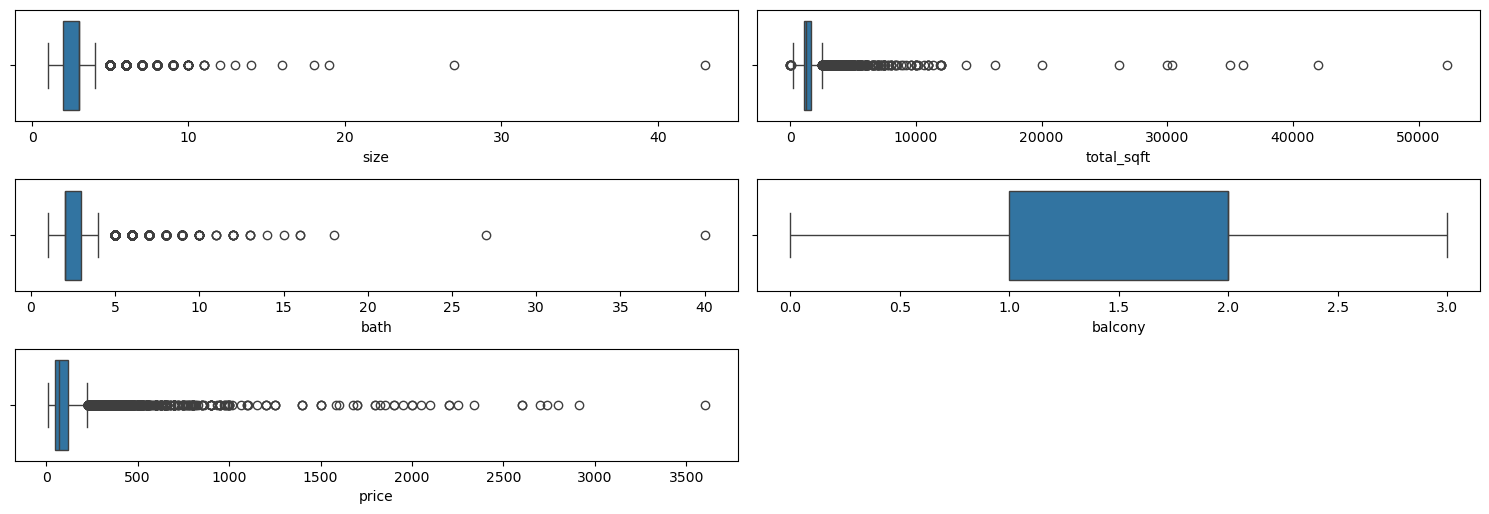

In [129]:
plt.figure(figsize=(15,15))
t=1
for i in df_House.select_dtypes(include=np.number).columns:
    plt.subplot(9,2,t)
    sns.boxplot(data=df_House, x=i)
    t=t+1
plt.tight_layout()
plt.show()

**We can see that, except for the balcony, the other features have outliers, especially extreme ones, which may need to be removed.**

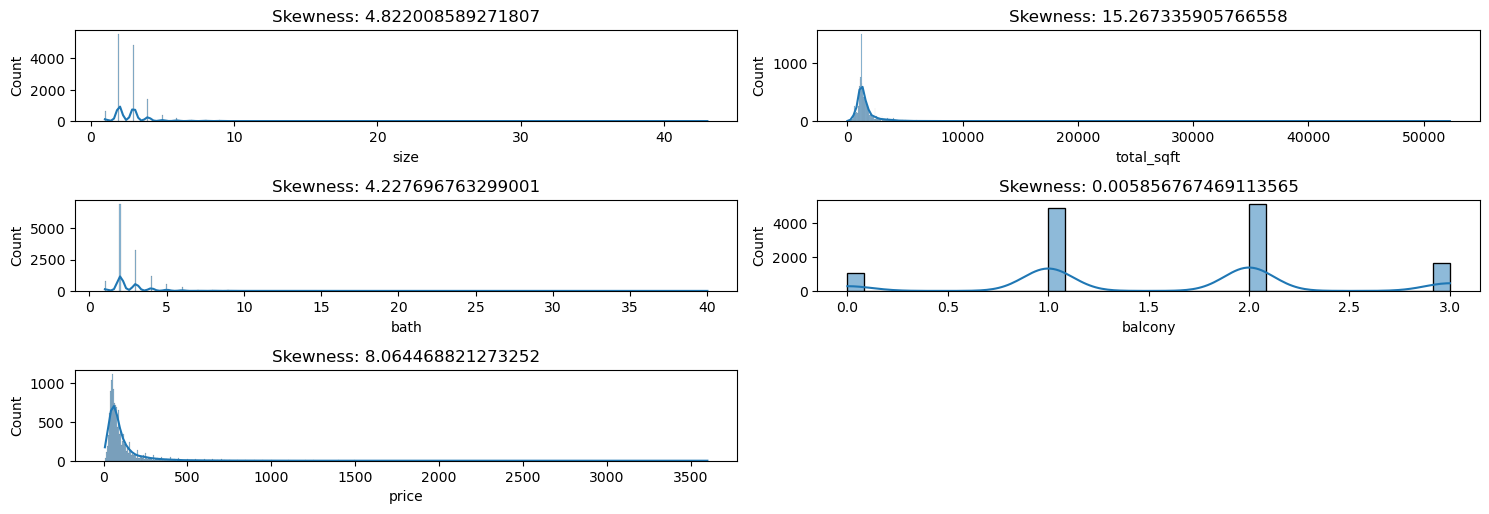

In [131]:
plt.figure(figsize=(15,15))
t=1
for i in df_House.select_dtypes(include=np.number).columns:
    plt.subplot(9,2,t)
    sns.histplot(data=df_House, x=i,kde=True)
    plt.title(f"Skewness: {df_House[i].skew()}")
    t=t+1
plt.tight_layout()
plt.show()

In [133]:
for col in df_House.select_dtypes(include=np.number).columns:
    skewness = df_House[col].skew()
    
    if skewness > 1 or skewness < -1:
        print(f"{col}: Highly skewed ({skewness:.2f})")
    
    elif 0.5 < skewness <= 1 or -1 < skewness <= -0.5:
        print(f"{col}: Moderately skewed ({skewness:.2f})")
    
    else:
        print(f"{col}: Approximately symmetric ({skewness:.2f})")

size: Highly skewed (4.82)
total_sqft: Highly skewed (15.27)
bath: Highly skewed (4.23)
balcony: Approximately symmetric (0.01)
price: Highly skewed (8.06)


**Since the data is skewed, we may need to apply transformations later.**

<a id="Bivaritate_Analysis"></a>
<div align='left'>
    <font color="#145da0" , size = 3px>
        <b> 3.2 Bivaritate_Analysis </b>
    </font>
</div>

In [140]:
df_House.select_dtypes(exclude=np.number)

,area_type,availability,location,society
0,Super built-up Area,Under Construction,Others,Coomee
1,Plot Area,Ready To Move,Others,Theanmp
2,Built-up Area,Ready To Move,Others,NaN
3,Super built-up Area,Ready To Move,Others,Soiewre
4,Super built-up Area,Ready To Move,Others,NaN
...,...,...,...,...
13315,Built-up Area,Ready To Move,Others,ArsiaEx
13316,Super built-up Area,Ready To Move,Others,NaN
13317,Built-up Area,Ready To Move,Others,Mahla T
13318,Super built-up Area,Under Construction,Others,SollyCl


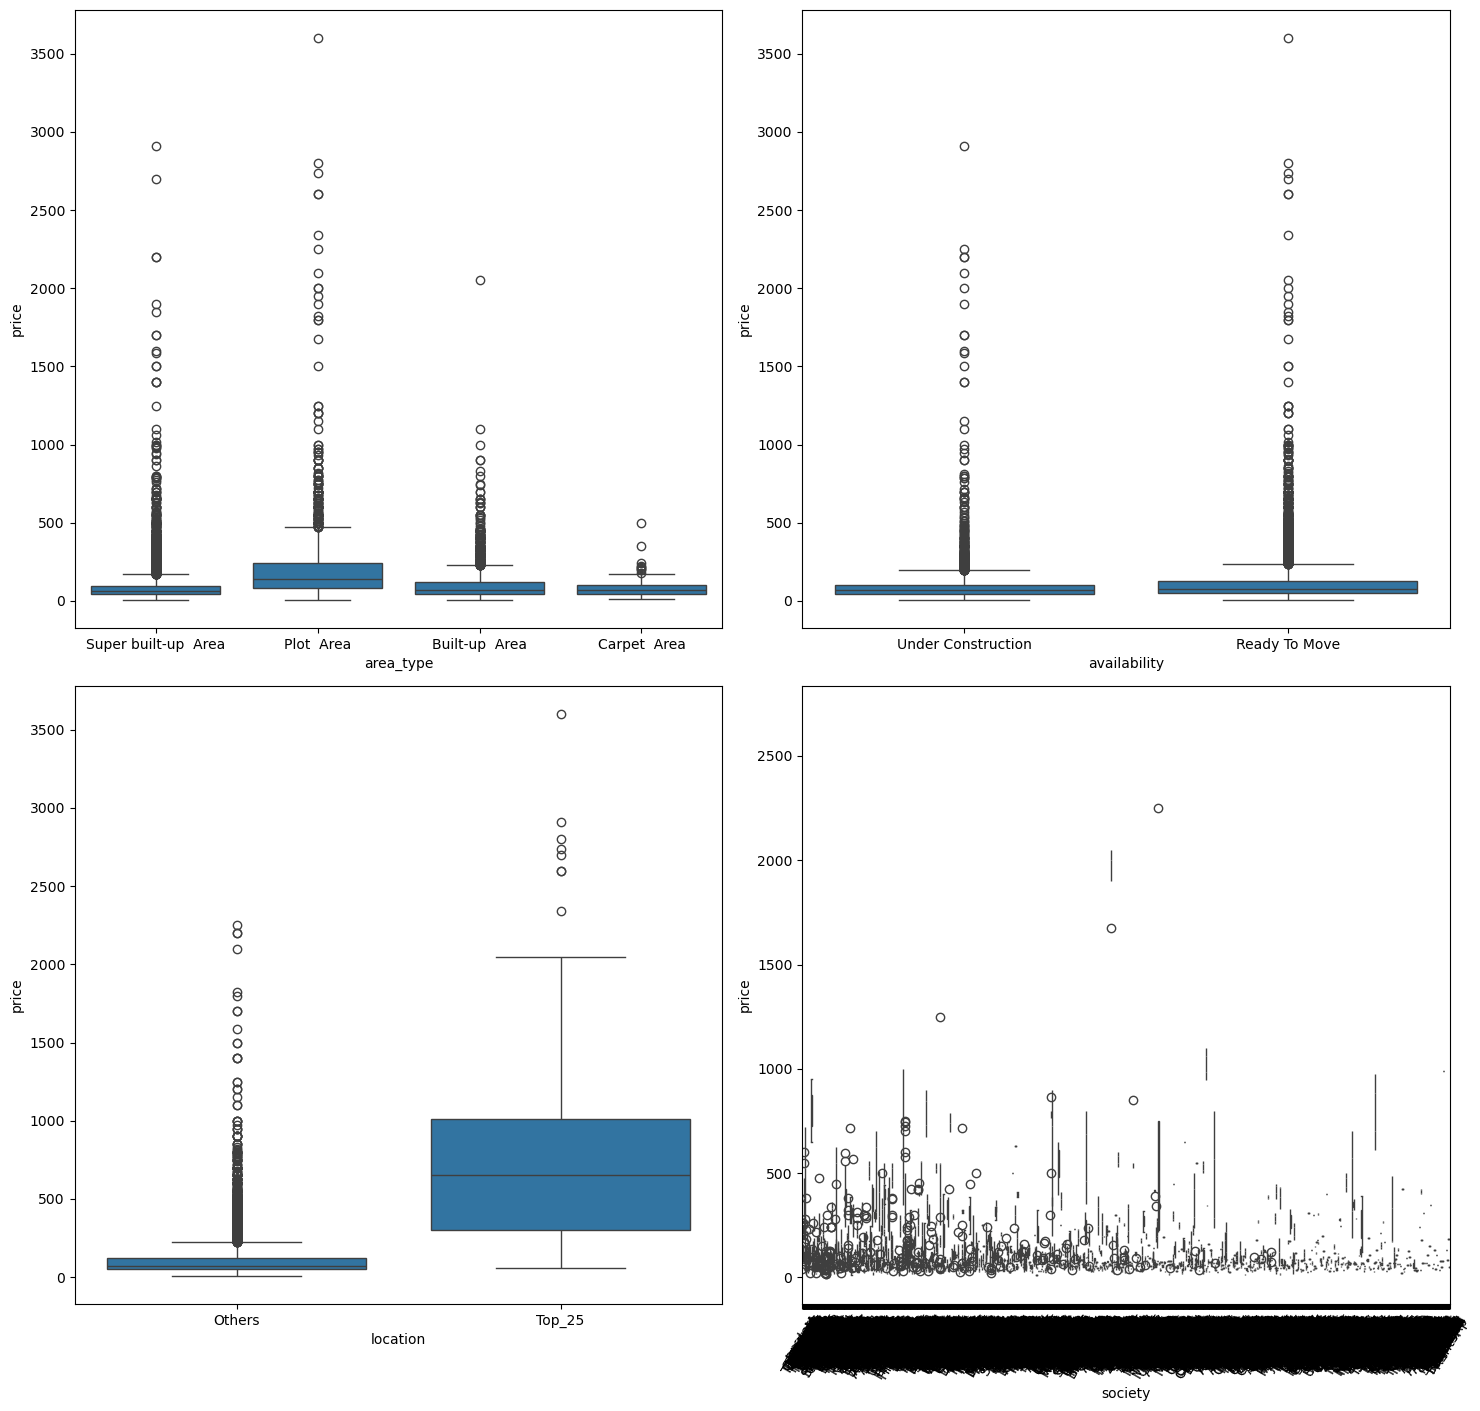

In [141]:
plt.figure(figsize=(15,20))
t=1
for i in df_House.select_dtypes(exclude=np.number).columns:
    plt.subplot(3,2,t)
    sns.boxplot(data=df_House, x=i,y=df_House["price"])
    t=t+1
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

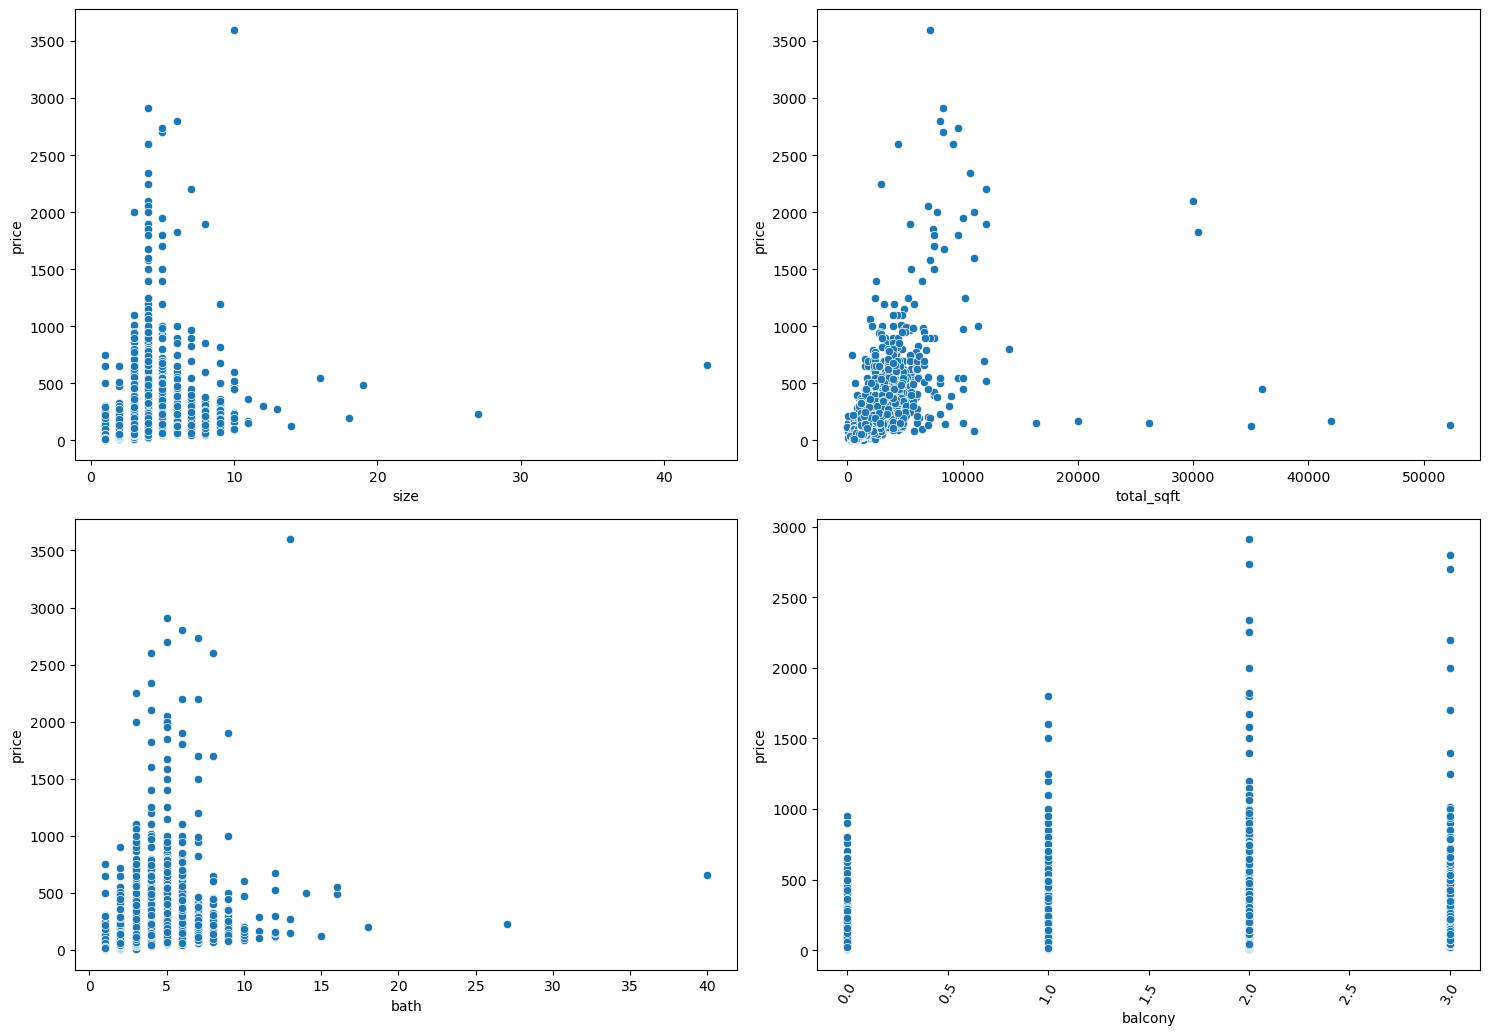

In [146]:
plt.figure(figsize=(15,15))
t=1
for i in df_House.drop(columns="price").select_dtypes(include=np.number).columns:
    plt.subplot(3,2,t)
    sns.scatterplot(data=df_House, x=i,y=df_House["price"])
    t=t+1
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

<Axes: >

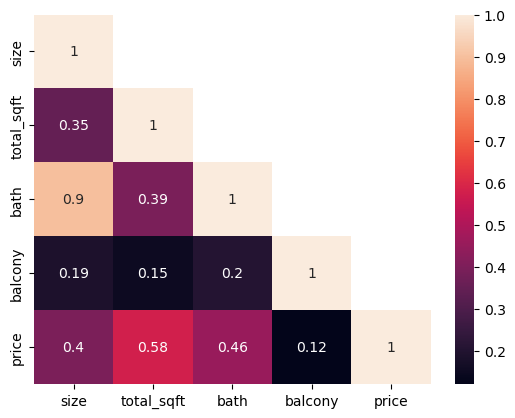

In [148]:
data_num=df_House.select_dtypes(include=np.number)
sns.heatmap(data=data_num.corr(),annot=True,mask=np.triu(data_num.corr(),k=1))

### Null value Checking

In [153]:
df_House.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft        46
bath              73
balcony          609
price              0
dtype: int64

In [154]:
df_House.isnull().sum()/df_House.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.000000
size             0.120120
society         41.306306
total_sqft       0.345345
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

**The 'society' column has around 41% missing values, which is quite high, so I am removing it. The 'balcony' column has around 4% missing values, which is manageable, so we can either impute or remove those rows**

### Null Value Treatment

In [158]:
df_House=df_House.drop(columns="society")
df_House.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Others,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Others,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Others,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Others,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Others,2.0,1200.0,2.0,1.0,51.00


In [159]:
pd.reset_option("display.max_rows")

In [160]:
df=df_House.dropna()
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Others,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Others,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Others,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Others,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Others,2.0,1200.0,2.0,1.0,51.00


In [161]:
df_House.shape[0]-df.shape[0]

651

### Outlier Detection 

In [173]:
#IQR Method
df.select_dtypes(include=np.number).quantile(0.25)

size             2.00
total_sqft    1100.00
bath             2.00
balcony          1.00
price           49.02
Name: 0.25, dtype: float64

### Outlier Removal

In [176]:
q1=df.select_dtypes(include=np.number).quantile(0.25)
q3=df.select_dtypes(include=np.number).quantile(0.75)
iqr=q3-q1

In [178]:
lower= q1-1.5*iqr
upper= q3+1.5*iqr

In [180]:
lower

size            0.50
total_sqft    290.00
bath            0.50
balcony        -0.50
price         -49.95
dtype: float64

In [182]:
upper

size             4.50
total_sqft    2450.00
bath             4.50
balcony          3.50
price          213.97
dtype: float64

In [184]:
((df.select_dtypes(include=np.number)>upper) | (df.select_dtypes(include=np.number)<lower)).any(axis=1)

0        False
1         True
2        False
3        False
4        False
         ...  
13314    False
13315     True
13317    False
13318     True
13319    False
Length: 12669, dtype: bool

In [186]:
df_final=df[~((df.select_dtypes(include=np.number)>upper) | (df.select_dtypes(include=np.number)<lower)).any(axis=1)]
df_final

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Others,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Others,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Others,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Others,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Others,2.0,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Others,2.0,1262.0,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Others,3.0,1345.0,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Others,3.0,1715.0,3.0,3.0,112.00
13317,Built-up Area,Ready To Move,Others,2.0,1141.0,2.0,1.0,60.00


**The IQR method removes a significant amount of data, which may still be relevant. However, for now, we will proceed with this approach and explore other methods later.**



<a id="Feature_Engineering_Intro"></a>
<div align='left'>
    <font color="#145da0" , size = 5px>
        <b> 4. Feature  Engineering </b>
    </font>
</div>

### Encoding

In [192]:
df_model=pd.get_dummies(data=df_final,dtype="int",drop_first=True)
df_model

,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Under Construction,location_Top_25
0,2.0,1056.0,2.0,1.0,39.07,0,0,1,1,0
2,3.0,1440.0,2.0,3.0,62.00,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,95.00,0,0,1,0,0
4,2.0,1200.0,2.0,1.0,51.00,0,0,1,0,0
5,2.0,1170.0,2.0,1.0,38.00,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
13312,2.0,1262.0,2.0,2.0,47.00,0,0,1,0,0
13313,3.0,1345.0,2.0,1.0,57.00,0,0,1,0,0
13314,3.0,1715.0,3.0,3.0,112.00,0,0,1,0,0
13317,2.0,1141.0,2.0,1.0,60.00,0,0,0,0,0




<a id="Model_Training_and_Evaluation"></a>
<div align='left'>
    <font color="#145da0" , size = 5px>
        <b> 5. Model Training and Evaluation </b>
    </font>
</div>

In [196]:
x= df_model.drop(columns="price")
y=df_model.price

In [198]:
#Train Test split

In [200]:
xtrain,xtest, ytrain,ytest= train_test_split(x,y, train_size=0.8, random_state=1)

In [202]:
for i,j in zip( ["xtrain","xtest", "ytrain","ytest"],[xtrain,xtest, ytrain,ytest]):
    print(f"{i} size:{j.shape}")

xtrain size:(8592, 9)
xtest size:(2148, 9)
ytrain size:(8592,)
ytest size:(2148,)


In [205]:
### Model Selection adn Evaluation

In [207]:
def model_evaluation(model_name, xtrain,xtest, ytrain,ytest):
    global model
    model=model_name
    model.fit(xtrain,ytrain)

    print("\n #Training\n")
    ypred_train=model.predict(xtrain)
    print("r2",r2_score(ytrain,ypred_train))
    print("Mean Squared Error",mean_squared_error(ytrain,ypred_train))
    print("Root Mean Squared Error",root_mean_squared_error(ytrain,ypred_train))
    
    print("Mean Absoulte Error",mean_absolute_error(ytrain,ypred_train))
    print("Mean Absoulte Percentage Error",mean_absolute_percentage_error(ytrain,ypred_train))

    print("______________________________________________________")
    print("\n #Testing\n")
    ypred_test=model.predict(xtest)
    print("r2",r2_score(ytest,ypred_test))
    print("Mean Squared Error",mean_squared_error(ytest,ypred_test))
    print("Root Mean Squared Error",root_mean_squared_error(ytest,ypred_test))
    
    print("Mean Absoulte Error",mean_absolute_error(ytest,ypred_test))
    print("Mean Absoulte Percentage Error",mean_absolute_percentage_error(ytest,ypred_test))




In [209]:
#Linear Regression
model_evaluation(LinearRegression(), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.5400107130340012
Mean Squared Error 630.2041953178407
Root Mean Squared Error 25.103868134569236
Mean Absoulte Error 18.354037911359466
Mean Absoulte Percentage Error 0.280293988230192
______________________________________________________

 #Testing

r2 0.5660271378557354
Mean Squared Error 552.4899825988616
Root Mean Squared Error 23.50510545815231
Mean Absoulte Error 17.39446235052209
Mean Absoulte Percentage Error 0.27558917380391257


In [211]:
#KNeighborsRegressor
model_evaluation(KNeighborsRegressor(), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.6892485171047333
Mean Squared Error 425.74228089862663
Root Mean Squared Error 20.633523230379893
Mean Absoulte Error 13.984847416201118
Mean Absoulte Percentage Error 0.20480839592714944
______________________________________________________

 #Testing

r2 0.5574512683176314
Mean Squared Error 563.4079049511173
Root Mean Squared Error 23.736215051080013
Mean Absoulte Error 16.252007914338922
Mean Absoulte Percentage Error 0.2443916241393187


In [213]:
#DecisionTreeRegressor
model_evaluation(DecisionTreeRegressor(), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.8732516339842856
Mean Squared Error 173.65046160018233
Root Mean Squared Error 13.177650078833567
Mean Absoulte Error 6.790843657150802
Mean Absoulte Percentage Error 0.10356379838269465
______________________________________________________

 #Testing

r2 0.368797995020827
Mean Squared Error 803.5820097694991
Root Mean Squared Error 28.347522109868777
Mean Absoulte Error 18.253707895608915
Mean Absoulte Percentage Error 0.26959704427835024


In [215]:
#RandomForestRegressor
model_evaluation(RandomForestRegressor(), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.8410215867308143
Mean Squared Error 217.8069486531759
Root Mean Squared Error 14.75828406872479
Mean Absoulte Error 9.610016677031771
Mean Absoulte Percentage Error 0.14427741022862692
______________________________________________________

 #Testing

r2 0.5653092332305518
Mean Squared Error 553.403945540958
Root Mean Squared Error 23.524539220587467
Mean Absoulte Error 15.986862420795354
Mean Absoulte Percentage Error 0.24238442607614952


In [216]:
#AdaBoostRegressor
model_evaluation(AdaBoostRegressor(), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.4387243649127355
Mean Squared Error 768.9706477616846
Root Mean Squared Error 27.73032000828127
Mean Absoulte Error 22.493792353264748
Mean Absoulte Percentage Error 0.41137423543077
______________________________________________________

 #Testing

r2 0.4203071616352493
Mean Squared Error 738.0057928008359
Root Mean Squared Error 27.16626203217579
Mean Absoulte Error 22.034580677332062
Mean Absoulte Percentage Error 0.41082170458592465


In [217]:
#GradientBoostingRegressor
model_evaluation(GradientBoostingRegressor(), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.6254293129339044
Mean Squared Error 513.1772089500599
Root Mean Squared Error 22.653414951173694
Mean Absoulte Error 16.170227974955505
Mean Absoulte Percentage Error 0.24698736410649927
______________________________________________________

 #Testing

r2 0.6227191915160752
Mean Squared Error 480.3154425008159
Root Mean Squared Error 21.91610007507759
Mean Absoulte Error 15.791883384389712
Mean Absoulte Percentage Error 0.24826696383572908


In [218]:
#XGBRegressor
model_evaluation(XGBRegressor(), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.7405215503448769
Mean Squared Error 355.49612175927695
Root Mean Squared Error 18.854604789262407
Mean Absoulte Error 13.256581848018442
Mean Absoulte Percentage Error 0.20099873424087128
______________________________________________________

 #Testing

r2 0.5967562072854531
Mean Squared Error 513.3688657838195
Root Mean Squared Error 22.657644753676838
Mean Absoulte Error 15.777019654048447
Mean Absoulte Percentage Error 0.2423201022790592


In [219]:
#stacking

base_model = [ ("decision Tree",DecisionTreeRegressor()),
              ("random tree",RandomForestRegressor()),
              ("knn",KNeighborsRegressor())]
    
meta_model = XGBRegressor()


model_evaluation(StackingRegressor(estimators=base_model, final_estimator=meta_model),xtrain,xtest, ytrain,ytest)


 #Training

r2 0.7157961593371399
Mean Squared Error 389.37092185891845
Root Mean Squared Error 19.73248392521627
Mean Absoulte Error 13.11539361509753
Mean Absoulte Percentage Error 0.19292494686948508
______________________________________________________

 #Testing

r2 0.5402697295067369
Mean Squared Error 585.2816876382411
Root Mean Squared Error 24.192595719315467
Mean Absoulte Error 16.866149192788747
Mean Absoulte Percentage Error 0.2561650139947545


In [220]:
#voting
model_evaluation(VotingRegressor(estimators=base_model),xtrain,xtest, ytrain,ytest)


 #Training

r2 0.8363022972112426
Mean Squared Error 224.27256891527009
Root Mean Squared Error 14.975732667060736
Mean Absoulte Error 9.861741156907062
Mean Absoulte Percentage Error 0.14687528448560266
______________________________________________________

 #Testing

r2 0.5596602049558397
Mean Squared Error 560.5957121361665
Root Mean Squared Error 23.676902502991528
Mean Absoulte Error 16.03590219703862
Mean Absoulte Percentage Error 0.2414046345358639


In [227]:
### Hyperparameter Tuning

In [228]:
params= {"n_estimators": [50,100,150,200],
    "max_depth":[None,5,10],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2] }

Grid_random=GridSearchCV(estimator=RandomForestRegressor(), param_grid=params,verbose=3)
Grid_random.fit(xtrain,ytrain)
Grid_random.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.534 total time=   0.7s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.557 total time=   0.6s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.558 total time=   0.6s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.568 total time=   0.7s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.564 total time=   0.7s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.540 total time=   1.4s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.557 total time=   1.4s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.557 to

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [229]:
#RandomForestRegressor
model_evaluation(RandomForestRegressor(**Grid_random.best_params_), xtrain,xtest, ytrain,ytest)


 #Training

r2 0.6980000469004133
Mean Squared Error 413.75232602584225
Root Mean Squared Error 20.340902782960303
Mean Absoulte Error 14.541315247392665
Mean Absoulte Percentage Error 0.2210970880994057
______________________________________________________

 #Testing

r2 0.6138476199440515
Mean Squared Error 491.60982252087956
Root Mean Squared Error 22.172275988740523
Mean Absoulte Error 15.568672996678934
Mean Absoulte Percentage Error 0.24110253819004615


In [231]:
model.feature_names_in_

array(['size', 'total_sqft', 'bath', 'balcony', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'availability_Under Construction', 'location_Top_25'], dtype=object)

In [232]:
model.feature_importances_

array([0.05221442, 0.73178392, 0.08169038, 0.03174097, 0.00150507,
       0.07041113, 0.00769307, 0.01950234, 0.00345869])



<a id="Model_Deployment"></a>
<div align='left'>
    <font color="#145da0" , size = 5px>
        <b> 6. Model_Deployment </b>
    </font>
</div>

In [241]:
import pickle

In [242]:
with open ("model_random.pkl","wb") as file:
    pickle.dump(model,file)

In [243]:
with open ("model_random.pkl","rb") as file:
    loaded_model=pickle.load(file)

In [244]:
loaded_model.predict(xtest)

array([112.82700007,  24.7810561 ,  31.72194668, ...,  83.1727682 ,
        79.4516444 ,  63.46022769])

In [245]:
def model_predictions(size_n, total_sqft_n, bath_n, balcony_n, area_type_Carpet_Area_n,area_type_Plot_Area_n, area_type_Super_built_up_Area_n,availability_Under_Construction_n, location_Top_25_n):
    input_predictions= [[size_n, total_sqft_n, bath_n, balcony_n, area_type_Carpet_Area_n,area_type_Plot_Area_n, area_type_Super_built_up_Area_n,availability_Under_Construction_n, location_Top_25_n]]
    predictions= loaded_model.predict(input_predictions)
    return round(predictions[0],3)
    
    





In [246]:
model_predictions(2,1056,2,1,0,0,1,1,0)

C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


44.848

pip install gradio

pip install --upgrade typing_extensions

pip install --upgrade gradio


In [250]:
import gradio as grd

In [251]:
df_final.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Others,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Others,3.0,1440.0,2.0,3.0,62.00


In [252]:
df_model.head(2)

,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Under Construction,location_Top_25
0,2.0,1056.0,2.0,1.0,39.07,0,0,1,1,0
2,3.0,1440.0,2.0,3.0,62.00,0,0,0,0,0


In [254]:
for i in df_final.columns:
    print(df_final[i].unique())
    print("_______")

['Super built-up  Area' 'Built-up  Area' 'Plot  Area' 'Carpet  Area']
_______
['Under Construction' 'Ready To Move']
_______
['Others' 'Top_25']
_______
[2. 3. 1. 4.]
_______
[1056.  1440.  1521.  ...  613.  2395.  1258.5]
_______
[2. 3. 1. 4.]
_______
[1. 3. 2. 0.]
_______
[39.07 62.   95.   ... 96.8  63.93 40.14]
_______


In [255]:
model.feature_names_in_

array(['size', 'total_sqft', 'bath', 'balcony', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'availability_Under Construction', 'location_Top_25'], dtype=object)

In [256]:
interface = grd.Interface(fn=model_predictions,
                         inputs= [grd.Number(label="SIZE (BHK)"),
                                  grd.Number(label="total_sqft"),
                                  grd.Number(label="bath"),
                                  grd.Number(label="balcony"),
                                  grd.Dropdown([("Yes",1),("No",0)],label="Is it Carpet Area"),
                                  grd.Dropdown([("Yes",1),("No",0)],label="Is it Plot Area"),
                                  grd.Dropdown([("Yes",1),("No",0)],label="Is it Super Built-up Area"),
                                  grd.Dropdown([("Ready to Move",0),("Under Construction",1)],label="Availabilty"),# vate 0 vs 1
                                  grd.Dropdown([("Others",0),("Top_25",1)],label="Availabilty")
                                  
                                 ],
                          outputs=grd.Textbox("Expected Price of the property in Lakhs"), title="AJ Properties", 
                          description ="Enter the details to get expected price (Contact Admin to addunlisted locations)",
                          flagging_mode="manual",
                          flagging_dir="my_flags"
                           
                         )

In [257]:
interface.launch(share=False, inbrowser=True)


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1. **[Data Collection](#Data_Collection_Intro)**
    - 1.1 [Data Description](#Desc)
    - 1.2 [Data Importing and Overview](#Import)
    - 1.3 [Checking Shape of Data](#Shape)
    - 1.4 [Checking Data Types](#Type)
    - 1.5 [Data Descibe](#Data_Descibe)

2. **[Data_Preprocessing](#Data_Preprocessing_Intro)**
    - 2.1 [Data Type Change](#Desc)
    - 2.2 [Dat